# Duffing Equation

Created by: Wesley Terrill
Revision: 02/05/2019

Modify pendulum class with duffing equations

In [2]:
%matplotlib inline 

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

## Duffing Class and Utility Functions

In [4]:
class Duffing():
    """
    Duffing class implements the parameters and differential equation for 
     a Duffing equation.
     
    Parameters
    ----------
    delta : float
        damping coefficient 
    alpha : float
        linear stiffness control 
    beta : float
        amount of non-linearity in the restoring force 
    gamma : float
        amplitude of the periodic driving force 
    omega : float
        angular frequency of the periodic driving force

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, delta=1., alpha=0.2,
                 beta=0.2, gamma=0.689, omega=0.
                ):
        self.delta = delta
        self.beta = beta
        self.alpha = alpha
        self.gamma = gamma
        self.omega = omega
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dx d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = x, y[1] = dx/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], F_ext - self.delta*y[1] - self.alpha*y[0] \
                - self.beta*(y[0]**3)]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma*np.cos(self.omega * t)  
    
    def solve_ode(self, x_0, x_dot_0, abserr=1.0e-10, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x_0, x_dot_0]  
        x, x_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return x, x_dot

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None, marker=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle,marker=marker)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle,marker=marker)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle, marker=marker)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make Plots

In [7]:
# Labels for individual plot axes
x_vs_time_labels = (r'$t/T$', r'$x(t)$')
x_dot_vs_time_labels = (r'$t/T$', r'$dx/dt(t)$')
state_space_labels = (r'$x$', r'$dx/dt$')
 

# Common pendulum parameters
alpha = -1.
beta = 1.
delta = 0.3
omega = 1.2

gamma_list = [.20, .28, .29, .37, .50, .65]

# Common plotting time (generate the full time then use slices)
tau = 2 * np.pi / omega

t_start = 0.
t_end = 1000.
delta_index = 50
delta_t = tau/delta_index

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

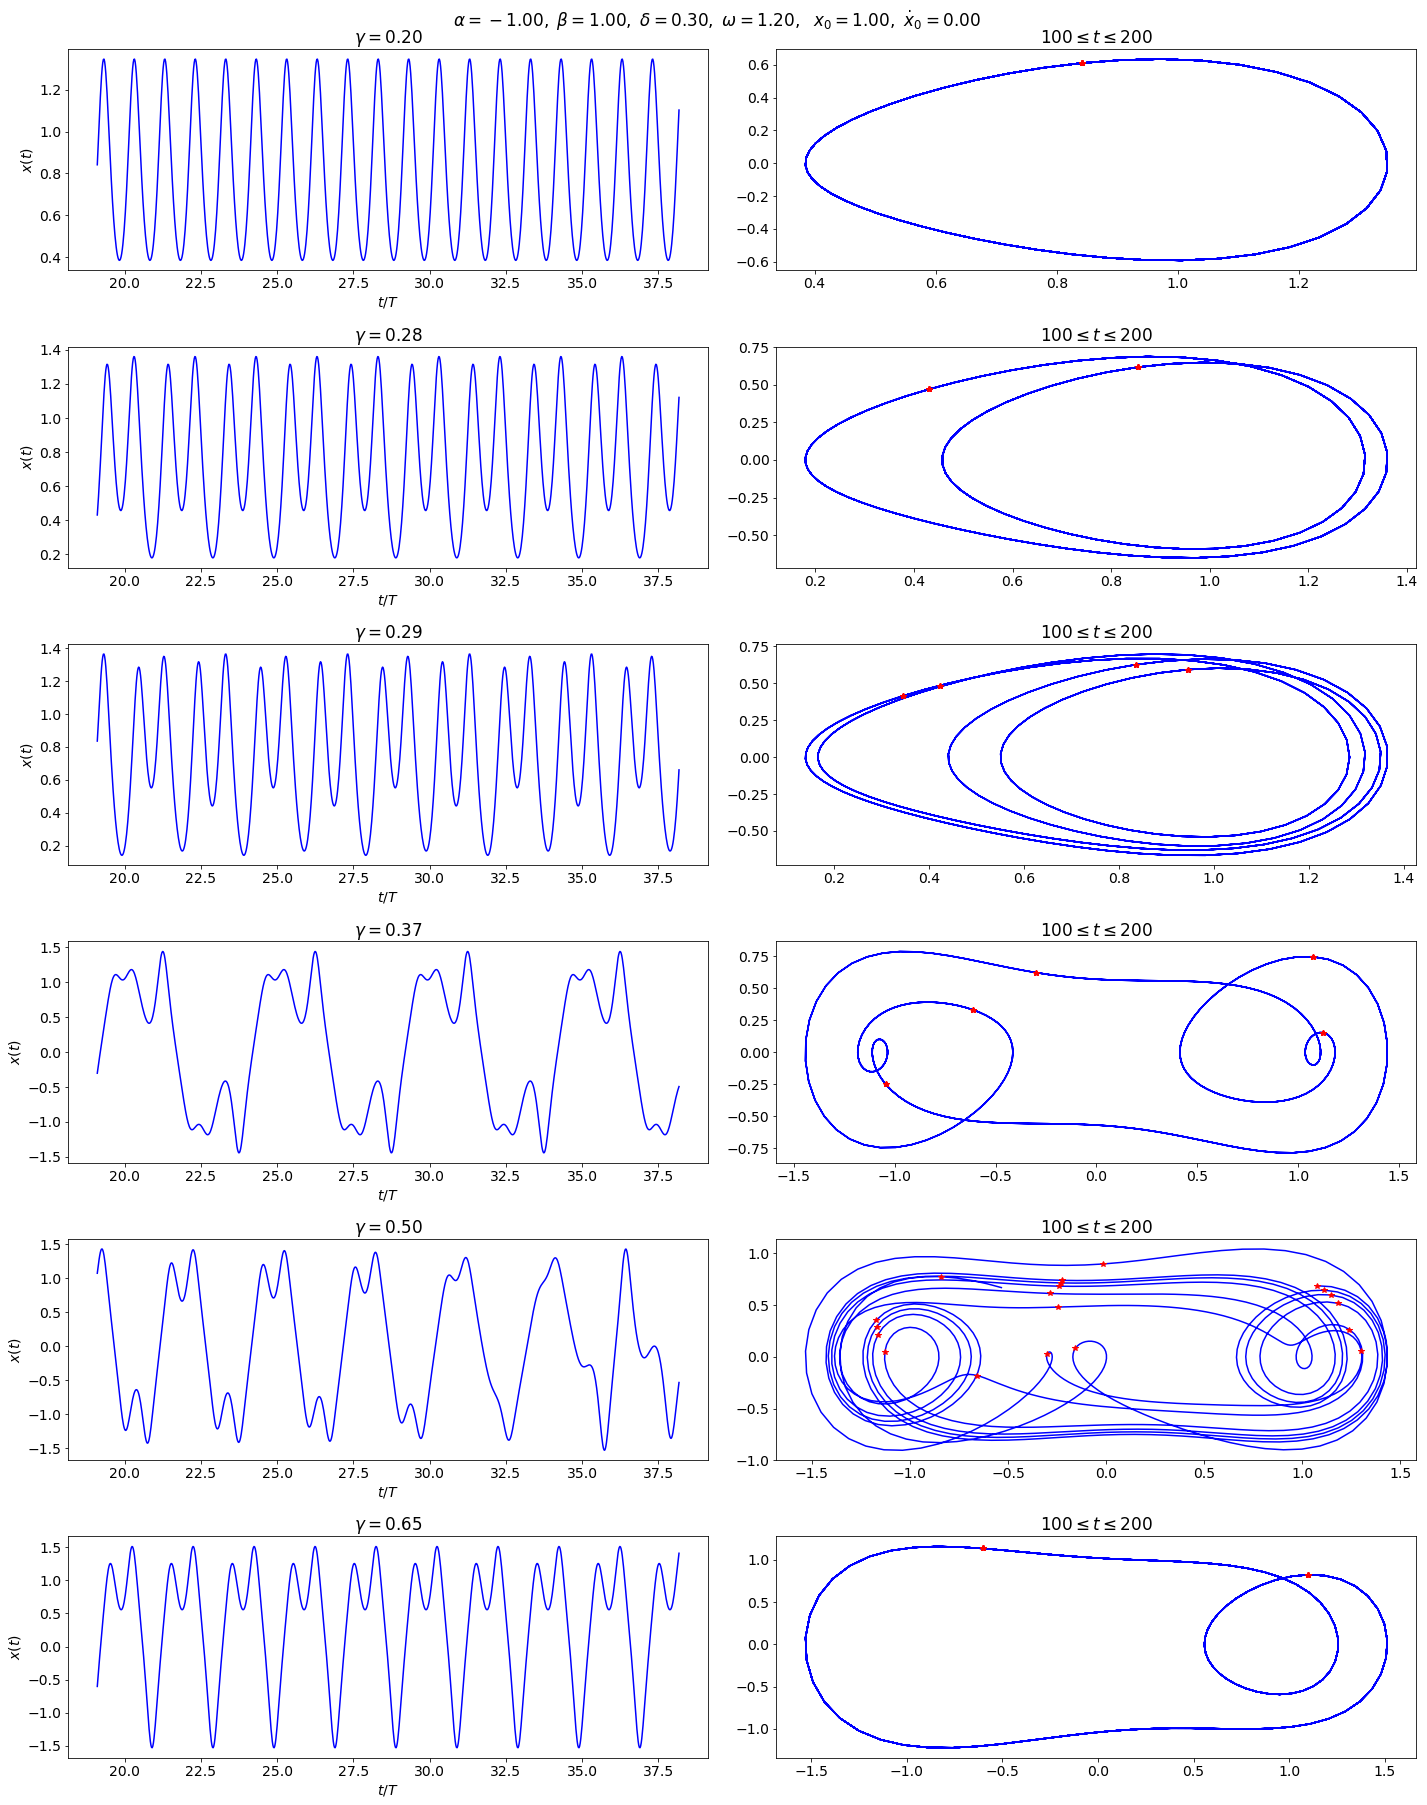

In [11]:
# initial conditions specified
x_0 = 1.
x_dot_0 = 0.0

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(20,25))
overall_title = rf' $\alpha = {alpha:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf' $\delta = {delta:.2f},$' + \
                rf' $\omega = {omega:.2f},$' + \
                rf'  $x_0 = {x_0:.2f},$' + \
                rf' $\dotx_0 = {x_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
for i, gamma in enumerate(gamma_list):
    # Instantiate duffing 
    d1 = Duffing(delta=delta, alpha=alpha, 
                 beta=beta, gamma=gamma, omega=omega)
    
    # calculate the driving force for t_pts
    driving = d1.driving_force(t_pts)
        
    #get points x and x_dot
    x, x_dot = d1.solve_ode(x_0, x_dot_0)
    
    # first plot: plot from t=0 to t=200   
    ax_a = fig.add_subplot(6,2,2*i+1)                  

    start, stop = start_stop_indices(t_pts, 100., 200.)    
    plot_y_vs_x(t_pts[start : stop]/tau, x[start : stop], 
            axis_labels=x_vs_time_labels, 
            color='blue',
            label=None, 
            title=rf'$\gamma = {gamma:.2f}$', 
            ax=ax_a)

    ax_b = fig.add_subplot(6,2,2*i+2)                  

    start, stop = start_stop_indices(t_pts, 100., 200.)    
    plot_y_vs_x(x[start : stop], x_dot[start : stop], 
                color='blue',
                label=None, 
                title=rf'$100 \leq t \leq 200.$', 
                ax=ax_b)
     
    ax_b.plot(x[start : stop : delta_index], 
              x_dot[start : stop : delta_index], 
              '*',
              color='red');

fig.tight_layout()

fig.savefig('Plots_of_Duffing.png',bbox_inches='tight')

For chaos, extend space phase plot out for longer time t.

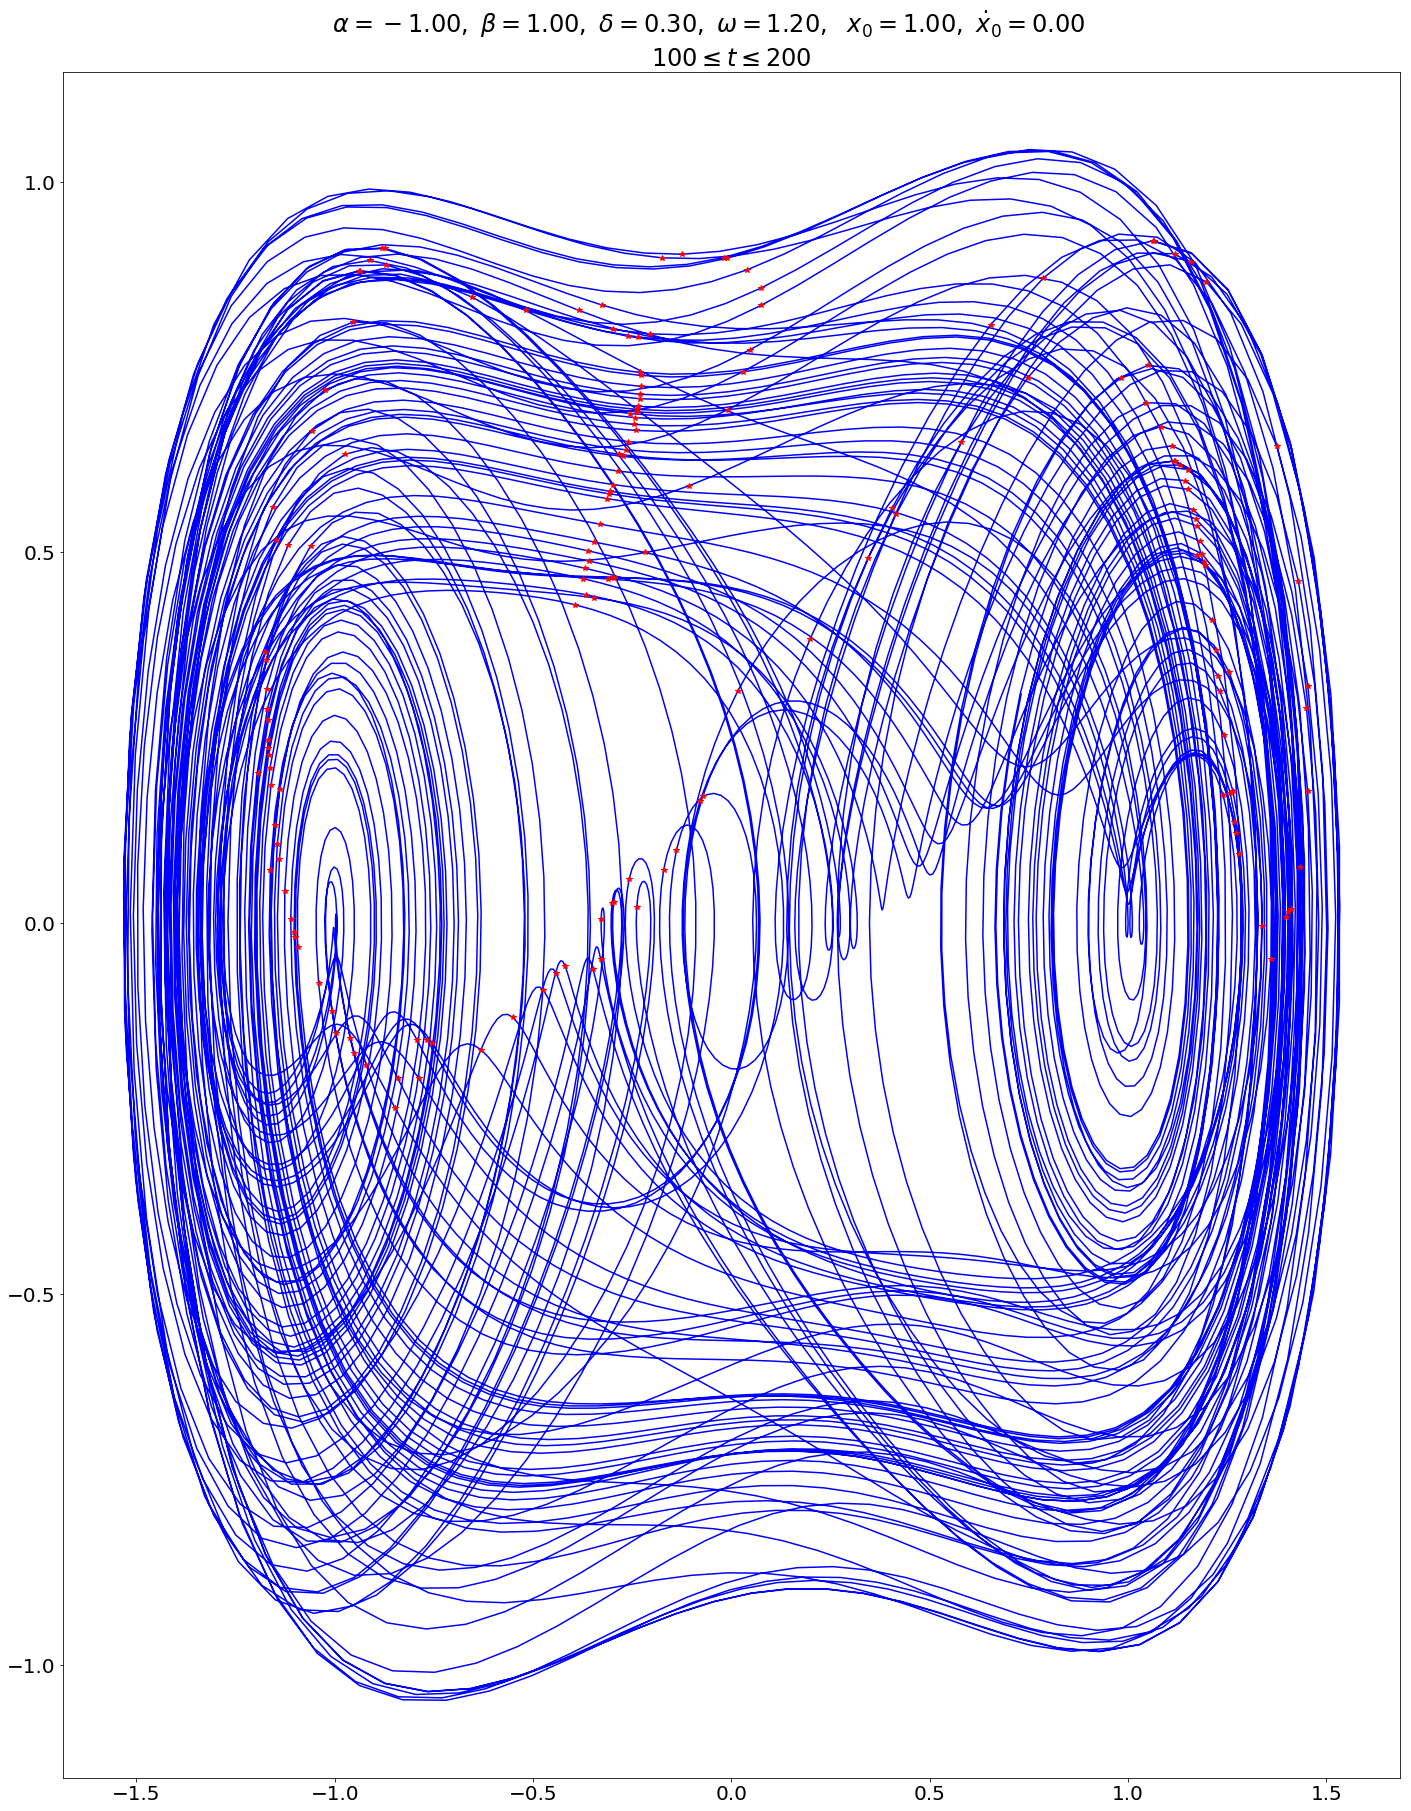

In [21]:
# initial conditions specified
x_0 = 1.
x_dot_0 = 0.0

d2 = Duffing(delta=delta, alpha=alpha, 
             beta=beta, gamma=0.50, omega=omega)

# calculate the driving force for t_pts
driving = d2.driving_force(t_pts)
        
#get points x and x_dot
x, x_dot = d2.solve_ode(x_0, x_dot_0)

font_size = 20
plt.rcParams.update({'font.size': font_size})

fig = plt.figure(figsize=(20,25))
overall_title = rf' $\alpha = {alpha:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf' $\delta = {delta:.2f},$' + \
                rf' $\omega = {omega:.2f},$' + \
                rf'  $x_0 = {x_0:.2f},$' + \
                rf' $\dotx_0 = {x_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=200   
ax_b = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 100., 1000.)    
plot_y_vs_x(x[start : stop], x_dot[start : stop], 
            color='blue',
            label=None, 
            title=rf'$100 \leq t \leq 200.$', 
            ax=ax_b);

ax_b.plot(x[start : stop : delta_index], 
          x_dot[start : stop : delta_index], 
          '*',
          color='red');


fig.tight_layout()
fig.savefig('chaotic_duffing.png', bbox_inches='tight')

In [9]:
start, stop = start_stop_indices(t_pts, 100., 150.)

for i, gamma in enumerate(gamma_list):
    # Instantiate duffing 
    d1 = Duffing(delta=delta, alpha=alpha, 
                 beta=beta, gamma=gamma, omega=omega)
    
    # calculate the driving force for t_pts
    driving = d1.driving_force(t_pts)
        
    #get points x and x_dot
    x, x_dot = d1.solve_ode(x_0, x_dot_0)
    
    print(rf'   t     x(t, gamma = {gamma:.2f})')
    for j in range(start, stop, delta_index):
        print(rf'{t_pts[j]:.2f}   {x[j]:.2f}')

   t     x(t, gamma = 0.20)
100.01   0.84
105.24   0.84
110.48   0.84
115.72   0.84
120.95   0.84
126.19   0.84
131.42   0.84
136.66   0.84
141.90   0.84
147.13   0.84
   t     x(t, gamma = 0.28)
100.01   0.43
105.24   0.85
110.48   0.43
115.72   0.85
120.95   0.43
126.19   0.85
131.42   0.43
136.66   0.85
141.90   0.43
147.13   0.85
   t     x(t, gamma = 0.29)
100.01   0.84
105.24   0.34
110.48   0.95
115.72   0.42
120.95   0.84
126.19   0.34
131.42   0.95
136.66   0.42
141.90   0.84
147.13   0.34
   t     x(t, gamma = 0.37)
100.01   -0.30
105.24   1.12
110.48   1.07
115.72   -1.04
120.95   -0.61
126.19   -0.30
131.42   1.12
136.66   1.07
141.90   -1.04
147.13   -0.61
   t     x(t, gamma = 0.50)
100.01   1.07
105.24   -0.94
110.48   -0.77
115.72   -0.30
120.95   1.40
126.19   -1.01
131.42   -0.35
136.66   1.41
141.90   -1.04
147.13   -0.33
   t     x(t, gamma = 0.65)
100.01   -0.60
105.24   1.10
110.48   -0.60
115.72   1.10
120.95   -0.60
126.19   1.10
131.42   -0.60
136.66   1.10
141

# Pendulum class ODE Solver

Change how pendulum class works

In [10]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega_0=1., beta=0.2,
                 gamma_ext=0.2, omega_ext=0.689, phi_ext=0.
                ):
        self.omega_0 = omega_0
        self.beta = beta
        self.gamma_ext = gamma_ext
        self.omega_ext = omega_ext
        self.phi_ext = phi_ext
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
                       + F_ext]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma_ext * self.omega_0**2 \
                              * np.cos(self.omega_ext*t + self.phi_ext)  
    
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        result = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y,
                                 t_eval=t_pts, 
                                 atol=abserr, rtol=relerr)
        
        phi = result.y[0,:]
        phi_dot = result.y[1,:]
        return phi, phi_dot 

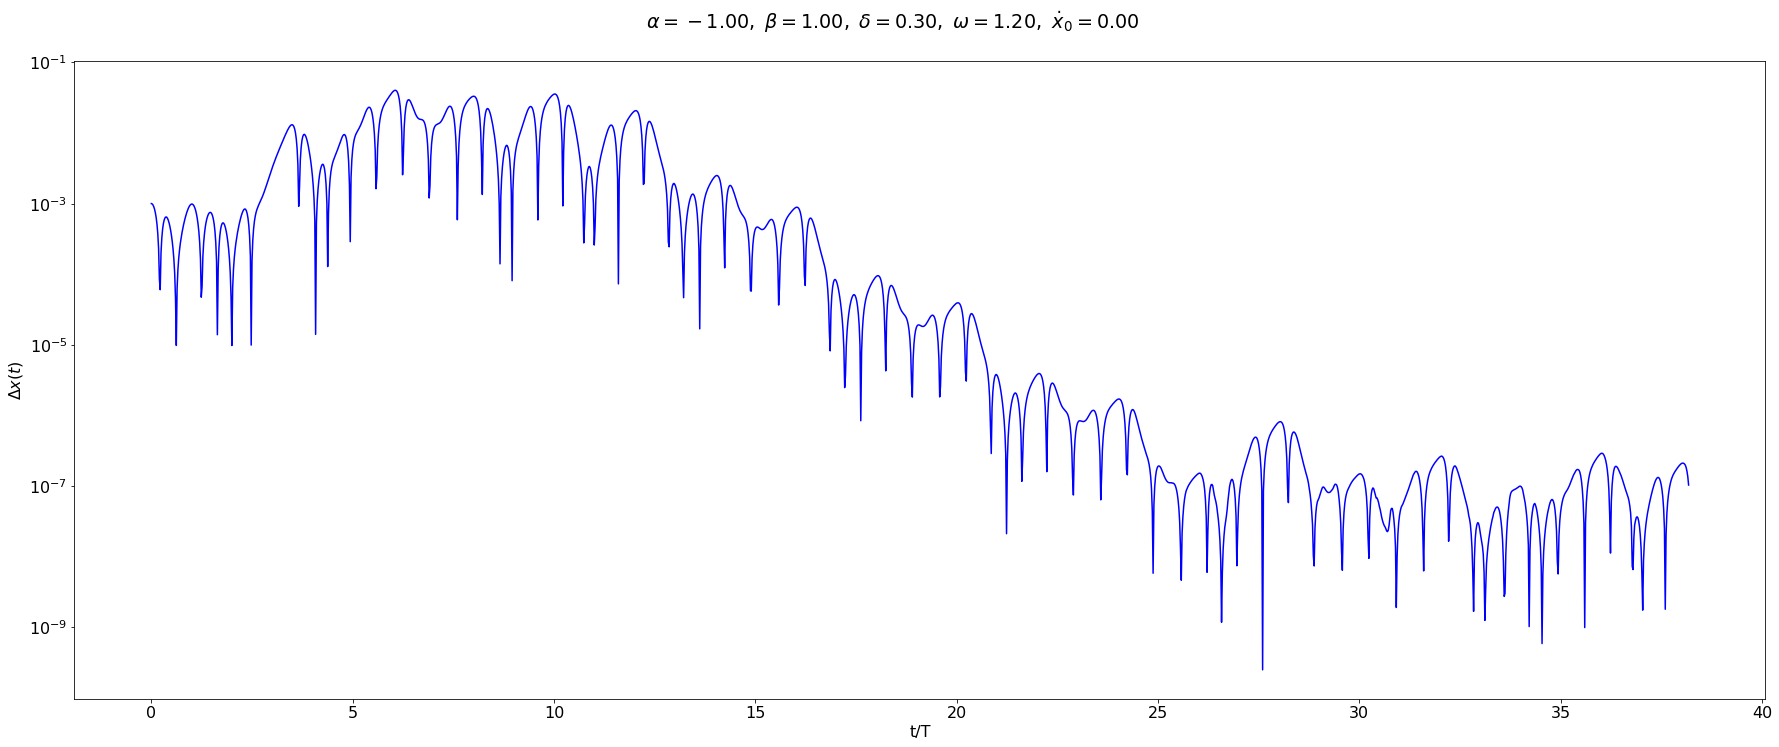

In [28]:
# initial conditions specified
x_01 = 1.
x_02 = 1.001
x_dot_0 = 0.0
x1, x_dot1 = d1.solve_ode(x_01, x_dot_0)
x2, x_dot2 = d1.solve_ode(x_02, x_dot_0)

dx=x2-x1
# Change the common font size
font_size = 16
plt.rcParams.update({'font.size': font_size})

fig = plt.figure(figsize=(25,10))
overall_title = rf' $\alpha = {alpha:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf' $\delta = {delta:.2f},$' + \
                rf' $\omega = {omega:.2f},$' + \
                rf' $\dotx_0 = {x_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_ps = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, 0., 200.)    
ax_ps.semilogy(t_pts[start : stop]/tau, np.abs(dx[start : stop]), color='blue')
ax_ps.set_xlabel('t/T')
ax_ps.set_ylabel('$\Delta x (t)$');

fig.tight_layout()
fig.savefig('delta_x_chaotic_duffing.png', bbox_inches='tight')